# Problem Statement

<div style="border: 1px solid thistle; padding: 5px 20px 10px 20px;">
    <h2><font color = "77658f" style=";">Feedback</font></h2><br>
    <font color = "77658f"> Good effort on P2 ! I feel there is room for improvement in your work (1) Your null imputation was done without any explanation. Justify your decisions for imputation. (2) No effort to eliminate any of the features based on yoru EDA (3) Cross validation should never be done on the test data. The tally of numbers are unclear to read. I feel there was no comparison on the test RMSE across models. (4) Its never a good idea to keep doing train test split everytime. You can do a train test split once and then use different subsets of the data. (5) The model you built was using all 270+ features, ideally in an entreprise setting you want to built a small model.
        
==========
     <br><br><br>
        • Problem Statement: <b>1</b> <br>
        • Data Cleaning and EDA: <b>1</b> <br>
        • Preprocessing and Modeling: <b>2</b><br>
        • Evaluation and Conceptual Understanding: <b>1</b><br>
        • Conclusion and Recomendation: <b>1</b><br>
        • Project Organization: <b>1</b><br>
        • Visualizations: <b>2</b><br>
        • Python Syntax and Control Flow: <b>2</b><br>
        • Presentation: <b>2</b><br>
    </font>
</div>

I am a agency of consultant company which give an advice to the real estate company which looking for building new house and do interior / outerior decoration for sale .To increase their sell price of the house to maximize their profit, I will find out which factor they need to focus in order improve the Sale price of the house. And I will also generalize model of prediction to see is it can modelize to another city or not.

In case they have limited budget I will help them to focus on the feature / quality to maximize their profit the most

**Import all necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations 

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#remove warning
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

import time
import itertools
from itertools import combinations 
import statsmodels.api as sm

**Read data into dataframe**

- load train.csv to train: use to create model and train
- load test.csv to test: use to predict value

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [3]:
#Check train data
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [4]:
#check test data
test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,879.000000,8.790000e+02,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,...,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,7.165050e+08,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,...,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,850.717105,1.889135e+08,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,...,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.500000,5.284861e+08,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1435.000000,5.354542e+08,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,...,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [5]:
#Test don't have SalePrice columns

print("Train has",train.shape[1],"columns, and ",train.shape[0],"rows")
print("Test has",test.shape[1],"columns, and ",test.shape[0],"rows")

Train has 81 columns, and  2051 rows
Test has 80 columns, and  879 rows


### EDA

ID and PID don't have any effect on Sale price, So I drop it.

In [6]:
#No need to use these
train.drop(columns=['Id','PID'],axis=1,inplace=True)

In [7]:
# 81-2 = 79 columns left
# I don't drop ID of test will use to predict and submit on kaggle
train.shape

(2051, 79)

Check Null value in each columns (features)

In [8]:
columns_null = train.columns[train.isnull().any()]
train[columns_null].isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [9]:
1000/2051

0.48756704046806437

I decide to drop 5 columns due to the too much missing data (approximately 50% of data missing) **'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'** 

In [10]:
#drop missing value 79 - 5 = 74 columns left on train and 
drop_cols = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']
clean_train = train.drop(drop_cols,axis=1) #DV: 79-5
clean_test = test.drop(drop_cols,axis=1) #DV: 80-5
clean_train.shape

(2051, 74)

In [11]:
#80 - 5 = 75 columns left on test
clean_test.shape

(879, 75)

**Manage missing value**

- Looking for null value in dataframe train

In [12]:
clean_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     1721 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Lot Shape        2051 non-null   object 
 6   Land Contour     2051 non-null   object 
 7   Utilities        2051 non-null   object 
 8   Lot Config       2051 non-null   object 
 9   Land Slope       2051 non-null   object 
 10  Neighborhood     2051 non-null   object 
 11  Condition 1      2051 non-null   object 
 12  Condition 2      2051 non-null   object 
 13  Bldg Type        2051 non-null   object 
 14  House Style      2051 non-null   object 
 15  Overall Qual     2051 non-null   int64  
 16  Overall Cond     2051 non-null   int64  
 17  Year Built    

- Seperating data into Categorical & Numercal type

In [13]:
#Take category type into list name category_col
category_col = list(clean_train.loc[:,clean_train.dtypes==np.object].columns)
category_col

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Sale Type']

In [14]:
#Take numerical type into list name numerical_col
numerical_col =  list(clean_train.loc[:,clean_train.dtypes!=np.object].columns)
numerical_col

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [15]:
#Due to testfile don't have SalePrice column I create numercal without the salesprice list to use later
numerical_col_no_sale_price = numerical_col
numerical_col_no_sale_price.remove('SalePrice')

In [16]:
#Already remove saleprice
numerical_col_no_sale_price

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

# EDA : Cleaning data / Imputing / Manage null value

Here is columns which have null category value:
1. Mas Vnr Type 
3. Bsmt Qual 
4. Bsmt Cond 
5. Bsmt Exposure 
6. BsmtFin Type 1 
7. BsmtFin Type 2
8. Fireplace Qu
9. Garage Type
10. Garage Finish
11. Garage Qual
12. Garage Cond 
13. Pool QC
14. Fence
15. Misc Feature

1. Mas Vnr Type -> fill with null

In [17]:
clean_train['Mas Vnr Type'].unique()
clean_train['Mas Vnr Type'] = clean_train['Mas Vnr Type'].fillna('null')
clean_test['Mas Vnr Type'] = clean_train['Mas Vnr Type'].fillna('null')
clean_test['Mas Vnr Type'].value_counts()

None       518
BrkFace    272
Stone       73
null        10
BrkCmn       6
Name: Mas Vnr Type, dtype: int64

2. Basement Quality & 3. Basement Condition

    BsmtQual: Height of the basement
    - Ex Excellent (100+ inches)
    - Gd Good (90-99 inches)
    - TA Typical (80-89 inches)
    - Fa Fair (70-79 inches)
    - Po Poor (<70 inches)
    - NA No Basement
    
    Ex Excellent
    - Gd Good
    - TA Typical - slight dampness allowed
    - Fa Fair - dampness or some cracking or settling
    - Po Poor - Severe cracking, settling, or wetness
    - NA No Basement

In [18]:
clean_train['Bsmt Qual'] = clean_train['Bsmt Qual'].fillna('null')
clean_train['Bsmt Cond'] = clean_train['Bsmt Cond'].fillna('null')
clean_test['Bsmt Qual'] = clean_test['Bsmt Qual'].fillna('null')
clean_test['Bsmt Cond'] = clean_test['Bsmt Cond'].fillna('null')

In [19]:
clean_train['Bsmt Qual'].value_counts()

TA      887
Gd      864
Ex      184
Fa       60
null     55
Po        1
Name: Bsmt Qual, dtype: int64

Mapping data to ordinal
   
   BsmtQual: Height of the basement
   - Ex - 5
   - Gd - 4
   - TA - 3
   - Fa - 2 
   - Po - 1
   - null - 0
   
   BsmtCond
   - Ex - 5
   - Gd - 4
   - TA - 3
   - Fa - 2
   - Po - 1
   - null - 0

In [20]:
clean_test['Bsmt Qual'].unique()

array(['Fa', 'Gd', 'TA', 'Ex', 'null', 'Po'], dtype=object)

In [21]:
clean_train['Bsmt Qual'] = clean_train['Bsmt Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'null':0})
clean_train['Bsmt Cond'] = clean_train['Bsmt Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'null':0})

clean_test['Bsmt Qual'] = clean_test['Bsmt Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'null':0})
clean_test['Bsmt Cond'] = clean_test['Bsmt Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'null':0})

In [22]:
print("train qual",clean_train['Bsmt Qual'].value_counts())


train qual 3    887
4    864
5    184
2     60
0     55
1      1
Name: Bsmt Qual, dtype: int64


In [23]:
print("train cond",clean_train['Bsmt Cond'].value_counts())


train cond 3    1834
4      89
2      65
0      55
1       5
5       3
Name: Bsmt Cond, dtype: int64


In [24]:
print("test qual",clean_test['Bsmt Qual'].value_counts())


test qual 3    396
4    355
5     74
2     28
0     25
1      1
Name: Bsmt Qual, dtype: int64


In [25]:
print("test cond",clean_test['Bsmt Cond'].value_counts())

test cond 3    782
2     39
4     33
0     25
Name: Bsmt Cond, dtype: int64


In [26]:
clean_train['Bsmt Qual'].value_counts()

3    887
4    864
5    184
2     60
0     55
1      1
Name: Bsmt Qual, dtype: int64

In [27]:
len(category_col)

37

In [28]:
#remove bsmt qual & cond from categorical and add to numerical
category_col.remove('Bsmt Qual')
category_col.remove('Bsmt Cond')
len(category_col)


35

In [29]:
len(numerical_col)

36

In [30]:
numerical_col.append('Bsmt Qual')
numerical_col.append('Bsmt Cond')
len(numerical_col)

38

3. Bsmt Exporsure: Walkout or garden level basement walls
- Gd Good Exposure: 3
- Av Average Exposure (split levels or foyers typically score average or above): 2 
- Mn Mimimum Exposure: 1
- No No Exposure: 0
- NA No Basement: 0

In [31]:
clean_train['Bsmt Exposure'] = clean_train['Bsmt Exposure'].fillna('NA')
clean_test['Bsmt Exposure'] = clean_test['Bsmt Exposure'].fillna('NA')

In [32]:
clean_train['Bsmt Exposure'] = clean_train['Bsmt Exposure'].map({'Gd': 3, 'Av': 2, 'Mn':1, 'No':0, 'NA':0})
clean_test['Bsmt Exposure'] = clean_test['Bsmt Exposure'].map({'Gd': 3, 'Av': 2, 'Mn':1, 'No':0, 'NA':0})

In [33]:
clean_train['Bsmt Exposure'].value_counts() 

0    1397
2     288
3     203
1     163
Name: Bsmt Exposure, dtype: int64

In [34]:
#clean_train[clean_train['Bsmt Exposure'].isnull()]

In [35]:
category_col.remove('Bsmt Exposure')
numerical_col.append('Bsmt Exposure')

4. BsmtFin Type 1 & type 2 -> each 58 records fill na will null

In [36]:
clean_train['BsmtFin Type 1'] = clean_train['BsmtFin Type 1'].fillna('null')
clean_test['BsmtFin Type 1'] = clean_test['BsmtFin Type 1'].fillna('null')

In [37]:
clean_train['BsmtFin Type 2'] = clean_train['BsmtFin Type 2'].fillna('null')
clean_test['BsmtFin Type 2'] = clean_test['BsmtFin Type 2'].fillna('null')

Garage Type -> fill with null

In [38]:
clean_train['Garage Type'] = clean_train['Garage Type'].fillna('null')
clean_test['Garage Type'] = clean_test['Garage Type'].fillna('null')

In [39]:
clean_train['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
null        113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

Garage Finish -> fill with null

In [40]:
clean_train['Garage Finish'] = clean_train['Garage Finish'].fillna('null')
clean_test['Garage Finish'] = clean_test['Garage Finish'].fillna('null')

In [41]:
clean_train['Garage Finish'].value_counts()

Unf     849
RFn     579
Fin     509
null    114
Name: Garage Finish, dtype: int64

Garage Qual: Garage quality
- Ex Excellent (5) 
- Gd Good (4)
- TA Typical/Average (3)
- Fa Fair (2)
- Po Poor (1)
- NA No Garage (0)

In [42]:
clean_train['Garage Qual'] = clean_train['Garage Qual'].fillna('null')
clean_test['Garage Qual'] = clean_test['Garage Qual'].fillna('null')

In [43]:
clean_train['Garage Qual'] = clean_train['Garage Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'null':0})
clean_test['Garage Qual'] = clean_test['Garage Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'null':0})

In [44]:
clean_train['Garage Qual'].value_counts()

3    1832
0     114
2      82
4      18
5       3
1       2
Name: Garage Qual, dtype: int64

In [45]:
category_col.remove('Garage Qual')
numerical_col.append('Garage Qual')

Garage Cond: Garage condition
- Ex Excellent (5) 
- Gd Good (4)
- TA Typical/Average (3)
- Fa Fair (2)
- Po Poor (1)
- NA No Garage (0)

In [46]:
clean_train['Garage Cond'] = clean_train['Garage Cond'].fillna('NA')
clean_test['Garage Cond'] = clean_test['Garage Cond'].fillna('NA')

In [47]:
clean_train['Garage Cond'] = clean_train['Garage Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
clean_test['Garage Cond'] = clean_test['Garage Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})

In [48]:
clean_train['Garage Cond'].value_counts()

3    1868
0     114
2      47
4      12
1       8
5       2
Name: Garage Cond, dtype: int64

In [49]:
category_col.remove('Garage Cond')
numerical_col.append('Garage Cond')

Mapping Heating QC to numerical because it is ordinal data
- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- Po Poor

In [50]:
clean_train['Heating QC'] = clean_train['Heating QC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})
clean_test['Heating QC'] = clean_test['Heating QC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})

In [51]:
category_col.remove('Heating QC')
numerical_col.append('Heating QC')

Mapping ExterCond: Present condition of the material on the exterior
- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- Po Poor

In [52]:
clean_train['Exter Cond'] = clean_train['Exter Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})
clean_test['Exter Cond'] = clean_test['Exter Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})

In [53]:
category_col.remove('Exter Cond')
numerical_col.append('Exter Cond')

In [54]:
clean_train['Exter Cond'].value_counts()

3    1778
4     215
2      49
5       7
1       2
Name: Exter Cond, dtype: int64

Mapping ExterQual: Exterior material quality
- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- Po Poor

In [55]:
clean_train['Exter Qual'] = clean_train['Exter Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})
clean_test['Exter Qual'] = clean_test['Exter Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1})

In [56]:
category_col.remove('Exter Qual')
numerical_col.append('Exter Qual')

In [57]:
clean_train['Exter Cond'].value_counts()

3    1778
4     215
2      49
5       7
1       2
Name: Exter Cond, dtype: int64

# Here is columns which have null numerical value:

In [58]:
clean_train[numerical_col].isnull().sum()

MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
Garage Qual          0
Garage Cond          0
Heating QC           0
Exter Cond           0
Exter Qual 

In [59]:
clean_test[numerical_col].isnull().sum()

MS SubClass          0
Lot Frontage       160
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area         1
BsmtFin SF 1         0
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       0
Bsmt Half Bath       0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt       45
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
Garage Qual          0
Garage Cond          0
Heating QC           0
Exter Cond           0
Exter Qual 

Missing value numerical
1. Lot Frontage 330
2. Mas Vnr Area 22
3. BsmtFin SF 1 1
4. BsmtFin SF 2 1
5. Bsmt Unf SF 1
6. Total Bsmt SF 1
7. Bsmt Full Bath 2
8. Bsmt Half Bath 2
9. Garage Yr Blt 114
10. Garage Cars 1
11. Garage Area 1

1. Lot Frontage: Linear feet of street connected to property fill it with mean value.

In [60]:
clean_train['Lot Frontage'] = clean_train['Lot Frontage'].fillna(clean_train['Lot Frontage'].mean())
clean_test['Lot Frontage'] = clean_test['Lot Frontage'].fillna(clean_test['Lot Frontage'].mean())

In [61]:
clean_train['Lot Frontage'].isnull().sum()

0

2. Mas Vnr Area <br>
Let's check that those house had Masonry type or not. If had no Masonry type, replace area with 0.

In [62]:
clean_train[clean_train['Mas Vnr Area'].isin([np.nan])][['Mas Vnr Area','Mas Vnr Type']]

,Mas Vnr Area,Mas Vnr Type
22,NaN,null
41,NaN,null
86,NaN,null
212,NaN,null
276,NaN,null
338,NaN,null
431,NaN,null
451,NaN,null
591,NaN,null
844,NaN,null


In [63]:
clean_train['Mas Vnr Area'] = clean_train['Mas Vnr Area'].fillna(0)
clean_test['Mas Vnr Area'] = clean_test['Mas Vnr Area'].fillna(0)
clean_train['Mas Vnr Area'].isnull().sum()

0

3. to 6. It's all basement let's take a look

In [64]:
clean_train[clean_train['BsmtFin SF 1'].isin([np.nan])][['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','BsmtFin Type 1']]

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,BsmtFin Type 1
1327,NaN,NaN,NaN,NaN,null


In [65]:
clean_train['BsmtFin SF 1'] = clean_train['BsmtFin SF 1'].fillna(0)
clean_train['BsmtFin SF 2'] = clean_train['BsmtFin SF 2'].fillna(0)
clean_train['Bsmt Unf SF'] = clean_train['Bsmt Unf SF'].fillna(0)
clean_train['Total Bsmt SF'] = clean_train['Total Bsmt SF'].fillna(0)

Test file in clean_test is no null value for this no need to handle

7. to  8. No basement which mean no bsmt Bath fill it with 0

In [66]:
clean_train[clean_train['Bsmt Full Bath'].isin([np.nan])][['Bsmt Full Bath','Bsmt Half Bath','BsmtFin Type 1']]

,Bsmt Full Bath,Bsmt Half Bath,BsmtFin Type 1
616,NaN,NaN,null
1327,NaN,NaN,null


In [67]:
clean_train['Bsmt Full Bath'] = clean_train['Bsmt Full Bath'].fillna(0)
clean_train['Bsmt Half Bath'] = clean_train['Bsmt Half Bath'].fillna(0)

Garage Yr Blt

In [68]:
clean_train['Garage Yr Blt'].isnull().sum()

114

In [69]:
clean_train[(clean_train['Garage Yr Blt'].isin([np.nan]))&(clean_train['Garage Type']=='null')][['Garage Yr Blt','Garage Type']]

,Garage Yr Blt,Garage Type
28,NaN,null
53,NaN,null
65,NaN,null
79,NaN,null
101,NaN,null
...,...,...
1991,NaN,null
2010,NaN,null
2027,NaN,null
2039,NaN,null


In [70]:
clean_train[['Garage Yr Blt','Year Built']].corr()

,Garage Yr Blt,Year Built
Garage Yr Blt,1.000000,0.825316
Year Built,0.825316,1.000000


113 columns of data which is null value because there is no garage. However it's have a strong coleration with Year built of the house so, I will drop Garage Yr Blt to avoid multicollinearity.

In [71]:
clean_train.shape

(2051, 74)

In [72]:
clean_train.drop('Garage Yr Blt', axis='columns', inplace=True)
clean_test.drop('Garage Yr Blt', axis='columns', inplace=True)

In [73]:
clean_train.shape

(2051, 73)

Remove 'Garage Yr Blt' from numerical columns name list

In [74]:
numerical_col.remove('Garage Yr Blt')

Garage Cars & Garage Area 
- Use mode to replace for Garage Cars because it is a discrete data type.
- Use mean to replace for Garage Area because it is a continuous data type.

And test data not have null no need to fill it

In [75]:
clean_train['Garage Cars'] = clean_train['Garage Cars'].fillna(clean_train['Garage Cars'].mode()[0])

In [76]:
clean_train['Garage Area'] = clean_train['Garage Area'].fillna(round(clean_train['Garage Area'].mean(),2))

**Feature engineer**

Therefore, have lots of numerical data. After I go through I think I will do feature engineering to reduce the number of features.
   1. Total SF = Total Bsmt SF + 1st Flr SF + 2nd Flr SF<br>
       These 3 columns represent the house size therefore, I combine them into 1 name Total SF
       <br><br>
   2. age_dwelling = ((Yr Sold - Year Built)* 12) + Mo Sold<br>
       I calculate age of the house by the year sold minus year built and plus the month that sold to get the age of house in month
       
    
       
After that I add TotalSF and age_dwelling to the list of numerical_col and drop columns that no longer use.

In [77]:
#2 function which calculate Total SF and age_dwelling
def add_total_SF(df):
    df['TotalSF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']
    
def age_dwelling(df):
    df['age_dwelling'] = ((df['Yr Sold'] - df['Year Built'])*12) + df['Mo Sold']

In [78]:
#call function to add columns in dataframe both train and test
add_total_SF(clean_train)
add_total_SF(clean_test)
age_dwelling(clean_train)
age_dwelling(clean_test)

#add TotalSF and age_dwelling to name list in numerical_col
numerical_col.append('TotalSF')
numerical_col.append('age_dwelling')


- Drop columns which we already combine

In [79]:
clean_train.drop(columns=['Total Bsmt SF', '1st Flr SF', '2nd Flr SF','Yr Sold','Year Built','Mo Sold'],inplace=True)
clean_test.drop(columns=['Total Bsmt SF', '1st Flr SF', '2nd Flr SF','Yr Sold','Year Built','Mo Sold'],inplace=True)

In [80]:
#remove column name from list that have already combine in new column
numerical_col = [x for x in numerical_col if x not in ['Total Bsmt SF', '1st Flr SF', 
                                                      '2nd Flr SF','Yr Sold','Year Built','Mo Sold']]

In [81]:
#DV
len(numerical_col)

39

In [82]:
#remove column name from list that have already combine in new column
numerical_col_no_sale_price = [x for x in numerical_col_no_sale_price if x not in ['Total Bsmt SF', '1st Flr SF', 
                                                      '2nd Flr SF','Yr Sold','Year Built','Mo Sold']]

In [83]:
clean_train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Sale Type,SalePrice,TotalSF,age_dwelling
0,60,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,44,0,0,0,0,0,WD,130500,2204.0,411
1,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,74,0,0,0,0,0,WD,220000,3035.0,160
2,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,52,0,0,0,0,0,WD,109000,2114.0,685
3,60,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,WD,174000,1828.0,52
4,50,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,59,0,0,0,0,0,WD,138500,2121.0,1323


In [84]:
clean_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Sale Type,TotalSF,age_dwelling
0,2658,902301120,190,RM,69.000000,9142,Pave,Reg,Lvl,AllPub,...,0,60,112,0,0,0,0,WD,2948,1156
1,2718,905108090,90,RL,69.630042,9662,Pave,IR1,Lvl,AllPub,...,170,0,0,0,0,0,0,WD,3934,356
2,2414,528218130,60,RL,58.000000,17104,Pave,IR1,Lvl,AllPub,...,100,24,0,0,0,0,0,New,2150,9
3,1989,902207150,30,RM,60.000000,8520,Pave,Reg,Lvl,AllPub,...,0,0,184,0,0,0,0,WD,1936,1015
4,625,535105100,20,RL,69.630042,9500,Pave,IR1,Lvl,AllPub,...,0,76,0,0,185,0,0,WD,2788,559


---------------------------

# Exploratory Data and Some Visualizations

**Quite hard to look so I filtering only corelation with SalePrice**

In [86]:
#Co-relation with saleprice & numercal data
clean_train[clean_train.columns[:]].corr()['SalePrice'][:-1].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
TotalSF            0.783108
Exter Qual         0.712146
Gr Liv Area        0.697038
Garage Area        0.650246
Garage Cars        0.648128
Bsmt Qual          0.612188
Year Remod/Add     0.550370
Full Bath          0.537969
TotRms AbvGrd      0.504014
Mas Vnr Area       0.503579
Fireplaces         0.471093
Heating QC         0.458354
BsmtFin SF 1       0.423856
Bsmt Exposure      0.413408
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Frontage       0.325850
Lot Area           0.296566
Garage Qual        0.285281
Bsmt Full Bath     0.283332
Half Bath          0.283001
Garage Cond        0.265021
Bsmt Cond          0.225075
Bsmt Unf SF        0.190861
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Exter Cond         0.036418
Pool Area          0.023106
BsmtFin SF 2       0.016432
Misc Val          -0.007375
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045290
MS SubClass       -0

I take absolute to corelation with salesprice and sort it to see which one is most effect to SalePrice

In [87]:
#take absolute to see the significant effect on saleprice whether it's positive or negative coleration
top_corr = np.abs(clean_train.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False)                                              

<AxesSubplot:>

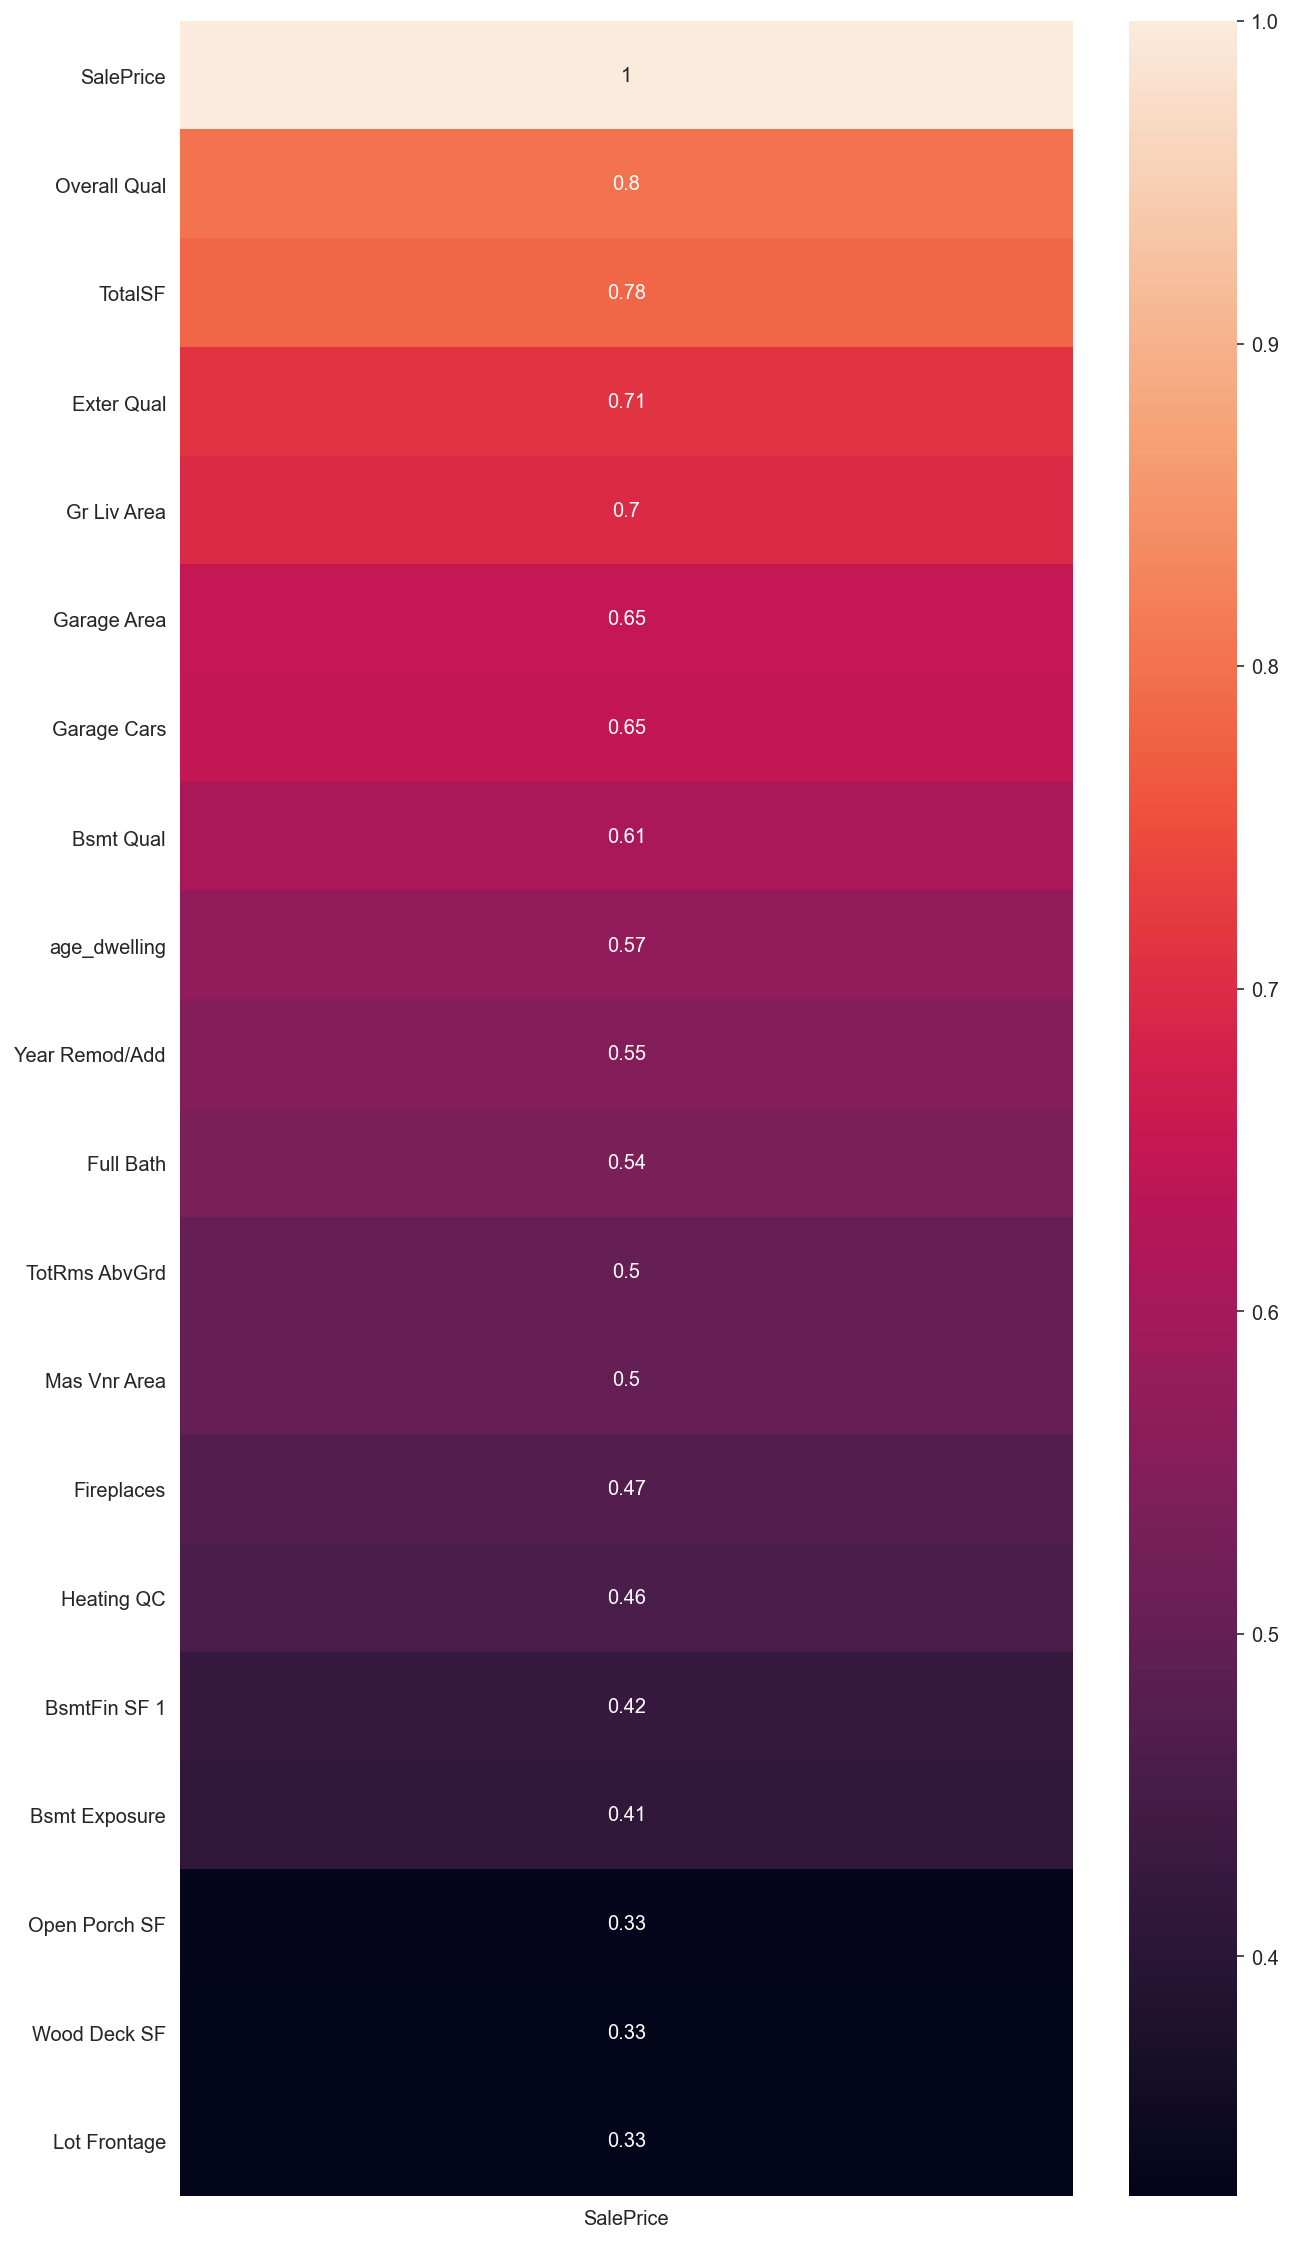

In [88]:
#Plot corelation of top co-relation
plt.figure(figsize = (10,20))
sns.heatmap(top_corr.head(20), annot = True)

**See top corelation with sales price**

I have select numerical which have sale price have coleration more than 0.2 (I have try on several number 0.5 make underfitting on model so I try to add on some numerical and 0.2 is optimal which make model least underfitting)

In [92]:
select_num_col = (top_corr[top_corr['SalePrice']>0.2].index).tolist()
select_num_col

['SalePrice',
 'Overall Qual',
 'TotalSF',
 'Exter Qual',
 'Gr Liv Area',
 'Garage Area',
 'Garage Cars',
 'Bsmt Qual',
 'age_dwelling',
 'Year Remod/Add',
 'Full Bath',
 'TotRms AbvGrd',
 'Mas Vnr Area',
 'Fireplaces',
 'Heating QC',
 'BsmtFin SF 1',
 'Bsmt Exposure',
 'Open Porch SF',
 'Wood Deck SF',
 'Lot Frontage',
 'Lot Area',
 'Garage Qual',
 'Bsmt Full Bath',
 'Half Bath',
 'Garage Cond',
 'Bsmt Cond']

- Plotting boxplot with categorical with sale price

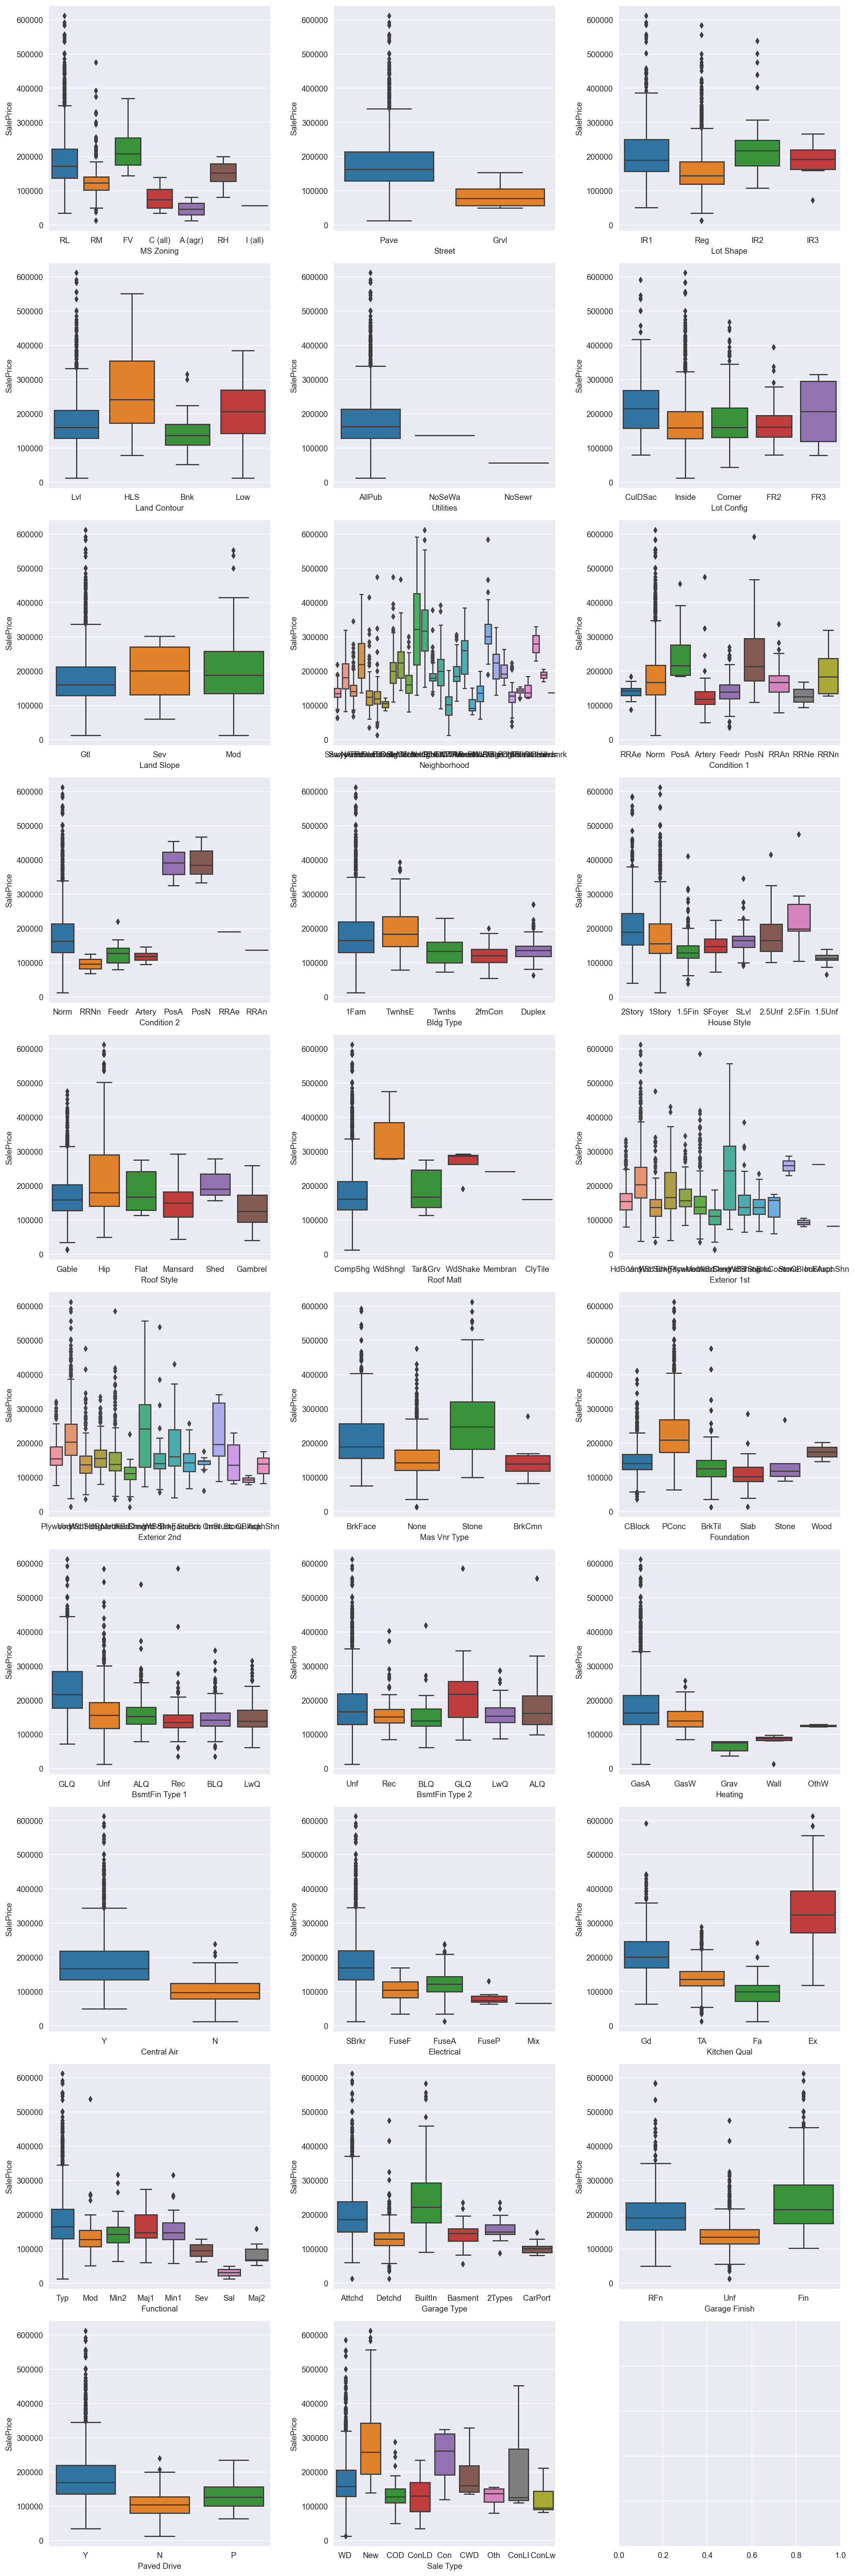

In [89]:
fig = plt.subplots(len(category_col) // 3 + 1, 3, figsize=(15, 45), sharey=True)
#loop through every categorical columns
for i, col in enumerate(category_col, 1):
    plt.subplot(len(category_col) // 3 + 1, 3, i)
    sns.boxplot(x=col, y='SalePrice', data=train)
    plt.tight_layout()

I have choose only some of categorical data. I don't pick which have not different in range of data or majority of data on one category such as Utilities, Land Slope, BsmtFin Type and etc, these will not pick for the model to train.

I choose 'Condition 1', 'Condition 2',  'Bldg Type', 'House Style','Roof Style', 'Roof Matl', 'Exterior 1st',
    'Exterior 2nd', 'Foundation', 'Heating', 'Kitchen Qual', 'Electrical','MS Zoning', 'Street','Neighborhood' for model

### Create dummy for categorical data

In [91]:
select_cat_col = [
    'Condition 1', 'Condition 2',  'Bldg Type', 'House Style','Roof Style', 'Roof Matl', 'Exterior 1st',
    'Exterior 2nd', 'Foundation', 'Heating', 'Kitchen Qual', 'Electrical','MS Zoning', 'Street','Neighborhood'
]

In [93]:
select_feature = select_num_col+select_cat_col
select_feature_no_saleprice = [x for x in select_feature if x != 'SalePrice']

In [94]:
select_feature

['SalePrice',
 'Overall Qual',
 'TotalSF',
 'Exter Qual',
 'Gr Liv Area',
 'Garage Area',
 'Garage Cars',
 'Bsmt Qual',
 'age_dwelling',
 'Year Remod/Add',
 'Full Bath',
 'TotRms AbvGrd',
 'Mas Vnr Area',
 'Fireplaces',
 'Heating QC',
 'BsmtFin SF 1',
 'Bsmt Exposure',
 'Open Porch SF',
 'Wood Deck SF',
 'Lot Frontage',
 'Lot Area',
 'Garage Qual',
 'Bsmt Full Bath',
 'Half Bath',
 'Garage Cond',
 'Bsmt Cond',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Kitchen Qual',
 'Electrical',
 'MS Zoning',
 'Street',
 'Neighborhood']

In [95]:
clean_train['Misc Val']

0       0
1       0
2       0
3       0
4       0
       ..
2046    0
2047    0
2048    0
2049    0
2050    0
Name: Misc Val, Length: 2051, dtype: int64

In [96]:
final_train = clean_train[select_feature]
final_test = clean_test[select_feature_no_saleprice]

In [97]:
dummy_train = pd.get_dummies(final_train, columns=select_cat_col)

In [99]:
final_train.shape

(2051, 41)

In [100]:
final_train.columns

Index(['SalePrice', 'Overall Qual', 'TotalSF', 'Exter Qual', 'Gr Liv Area',
       'Garage Area', 'Garage Cars', 'Bsmt Qual', 'age_dwelling',
       'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Mas Vnr Area',
       'Fireplaces', 'Heating QC', 'BsmtFin SF 1', 'Bsmt Exposure',
       'Open Porch SF', 'Wood Deck SF', 'Lot Frontage', 'Lot Area',
       'Garage Qual', 'Bsmt Full Bath', 'Half Bath', 'Garage Cond',
       'Bsmt Cond', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Foundation',
       'Heating', 'Kitchen Qual', 'Electrical', 'MS Zoning', 'Street',
       'Neighborhood'],
      dtype='object')

In [101]:
all_feature = [x for x in dummy_train.columns if x != 'SalePrice']

In [102]:
dummy_test = pd.get_dummies(final_test, columns=select_cat_col)

In [103]:
dummy_test.shape

(879, 145)

As you can see columns after doing dummy of train data is 276 and test is 264 due to categorical of train and test are not the same(such as color). So I do remove the different columns to make train and test equal so that it can compare in model

In [104]:
### Some categorical not equal therefore dummy is not equal we need to fix it

In [105]:
dummy_train[all_feature].shape

(2051, 154)

In [106]:
#Take a set of different column in train and test
missing_cols = set(dummy_train.columns) - set(dummy_test.columns)

# Add a missing column in test with default value equal to 0
for c in missing_cols:
    dummy_test[c] = 0
    
# Ensure the order of columns in test is the same as in train
dummy_test = dummy_test[all_feature]

In [107]:
dummy_train.shape

(2051, 155)

In [108]:
#test not have SalePrice so it's equal now
dummy_test.shape

(879, 154)

-----------------------------------------------------------------

# Create model to predict

### Baseline model:
Baseline model will be the mean value  

In [109]:
X = dummy_train[all_feature]
y = dummy_train['SalePrice']

In [110]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [111]:
baseline_preds = np.mean(y)
baseline_preds = [baseline_preds for i in range(len(train))]

In [112]:
print(f"MSE : {mean_squared_error(y, baseline_preds)}" )
print(f"RMSE : {np.sqrt(mean_squared_error(y, baseline_preds))}" )

MSE : 6278872217.837828
RMSE : 79239.33504161824


<b>The score of baseline model</b><br>
MSE : 6278872217.837828<br>
RMSE : 79239.33504161824<br>

### Linear Regression model:

Model 1 - pick top corelation numerical feature to predict

<AxesSubplot:>

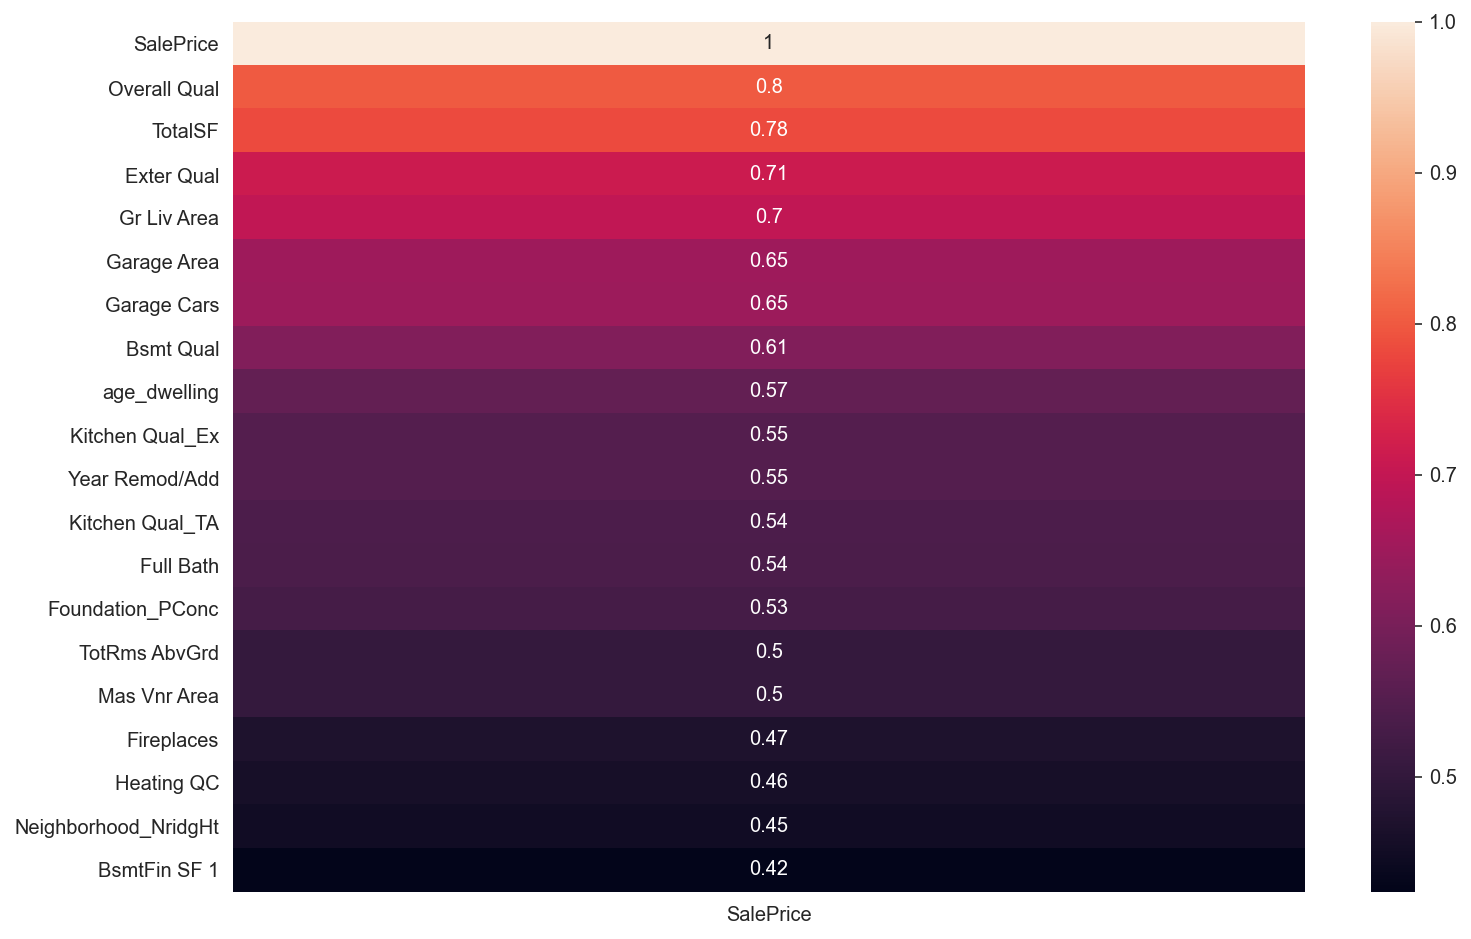

In [113]:
df_model1 = dummy_train
corr = df_model1.corr()

#take absolute to see corelation most value in cate sales
top_corr = np.abs(df_model1.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False) 
plt.figure(figsize = (12,8))
sns.heatmap(top_corr.head(20), annot = True)

In [114]:
#initiate the linear regression model and standard scaler
lr = LinearRegression()
ss = StandardScaler()

In [115]:
X = dummy_train[all_feature]
y = dummy_train['SalePrice']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
from sklearn.preprocessing import OneHotEncoder

In [118]:
X_train.shape

(1640, 154)

In [119]:
#transfrom data into same scale so it will not have bias 
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [120]:
#Fit model with train data
lr.fit(X_train_sc,y_train)

LinearRegression()

In [121]:
#score on train data
lr.score(X_train_sc,y_train)

0.9029560750818704

In [122]:
#unseen data score
cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

-1.043751465729611e+23

In [123]:
#score on test data
lr.score(X_test,y_test)

-3.535388901105183e+23

In [124]:
# DV
#You never do cross validation on the test dataset!! Only cross validate on the
#traininf dataset!
### I got to be more careful next time

In [125]:
y_preds = lr.predict(X_train_sc)

In [126]:
np.sqrt(mean_squared_error(y_train, y_preds))

24849.56716169401

In [127]:
y_preds_test = lr.predict(X_test_sc)

In [128]:
#RMSE of model 1 ##score is 35034.41179 which is underfit need to do more complexity
np.sqrt(mean_squared_error(y_test, y_preds_test))

2064439766303109.5

Linear Model is really bad when compare to the baseline the score on cross_val_score being negative and RMSE of test data is very very high

-----------------------

Model 1 - submission

In [129]:
X_ans = dummy_test[all_feature]
X_ans_sc =  ss.transform(X_ans)

In [130]:
predicts_ans = lr.predict(X_ans_sc)

In [131]:
index = clean_test['Id']
predicts_ans = pd.Series(predicts_ans)

df1 = pd.concat([index,predicts_ans],axis=1)
df1.rename(columns = {0:"SalePrice"},inplace=True)
df1.to_csv('ver3_submission_1.csv',index=False)

RMSE train data: 29,762.118<br>
RMSE test data: 958,428,349,241,939.1<br>
**Linear model is worst than baseline due to negative value from cross_val_score and RMSE**

-----------------------------------

### Ridge Model:

Model 2: Ridge with all feature

In [132]:
X = dummy_train[all_feature]
y = dummy_train['SalePrice']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [135]:
r_alphas = np.linspace(0.1,10,100)
ridge = RidgeCV(alphas=r_alphas)

In [136]:
ridge.fit(X_train_sc,y_train)
best_ridge_alpha = ridge.alpha_

In [137]:
ridge_r2_score_train = ridge.score(X_train_sc,y_train)
ridge_r2_score_train

0.9029284718675947

In [138]:
ridge_r2_score = cross_val_score(ridge,X_train_sc,y_train,cv=10).mean()
ridge_r2_score
#ridge_rmse_score = np.abs(cross_val_score(ridge,X_train_sc,y_train,cv=10,scoring='neg_root_mean_squared_error')).mean()

0.8466725386654289

RMSE ridge on train dataset

In [139]:
np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_sc)))

24853.10102101663

RMSE ridge on test dataset

In [140]:
np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_sc)))

24134.552494025098

In [141]:
# DV
# Compare your RMSE on your test data
### gotta be more careful next time kub

RMSE on train is 29767.274<br>
RMSE on test data 25756.43 
This model is is work quite better than the baseline as you can see from RMSE decreasing significantly. However, the model slightly underfitting (RMSE test data is lower than train)

-----------------------

Model 2 - submission

In [142]:
X_ans = dummy_test[all_feature]
X_ans_sc = ss.transform(X_ans)

In [143]:
index = clean_test['Id']
predicts_ans = ridge.predict(X_ans_sc)
predicts_ans = pd.Series(predicts_ans)

In [144]:
df_ridge = pd.concat([index,predicts_ans],axis=1)
df_ridge.rename(columns = {0:"SalePrice"},inplace=True)
df_ridge.to_csv('ver3_submission_2.csv',index=False)

In [145]:
# DV
# The lables are nclear to comprehend what is being said You do not list the test score, but say that the test score is higher than training score.
# What is the test score here?
### Ridge RMSE Unseen = 30000.454044968064 with Kaggle score = 28164.07401 to determine it is still overfit

----------------

### Lasso

Model 3 : Use lasso to do feature selections

In [146]:
X = dummy_train[all_feature]
y = dummy_train['SalePrice']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [149]:
l_alphas = np.arange(0.001, 0.15, 0.0025)

In [150]:
#alpha bset is 444.132
lasso = LassoCV()
lasso.fit(X_train_sc, y_train)
l_alphas_best = lasso.alpha_
l_alphas_best 

389.2903293111957

In [151]:
lasso.score(X_train_sc, y_train)

0.8998001190743905

In [152]:
lasso_r2_score = cross_val_score(lasso,X_train_sc,y_train,cv=10).mean()
lasso_r2_score
#lasso_rmse_score = np.abs(cross_val_score(lasso,X_train_sc,y_train,cv=10,scoring='neg_root_mean_squared_error')).mean()

0.8499705084742087

In [153]:
lasso.coef_

array([ 1.37792585e+04,  7.77323911e+03,  6.54696469e+03,  1.35005211e+04,
        4.81476615e+03,  2.65728298e+02,  1.68987269e+03, -5.27044653e+03,
        3.84031911e+03,  2.61670365e+03,  6.13824505e+02,  2.73578400e+03,
        3.51934696e+03,  2.42299856e+03,  6.17838350e+03,  6.12031195e+03,
       -7.10194934e+01,  0.00000000e+00,  2.65799943e+02,  3.92011193e+03,
       -0.00000000e+00,  3.52131769e+03,  9.95941371e+02, -1.11207931e+02,
       -0.00000000e+00, -8.96687245e+02, -0.00000000e+00,  1.25628479e+03,
        8.56604344e+02,  2.42914534e+03, -7.83921536e+02, -0.00000000e+00,
       -0.00000000e+00, -3.69015303e+02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.63625125e+03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  5.98380388e+03,  0.00000000e+00,
        0.00000000e+00, -9.99816770e+02, -2.13289344e+03,  0.00000000e+00,
        1.98568061e+02,  4.65793094e+01,  1.49479604e+03,  0.00000000e+00,
       -0.00000000e+00, -

In [154]:
#Take lasso coef into dataframe with name feature to do some plot later
df_lasso_coef = pd.DataFrame(lasso.coef_,columns=["lasso_coef"])

In [155]:
df_lasso_coef['feature'] = dummy_train[all_feature].columns

In [156]:
df_lasso_coef

,lasso_coef,feature
0,13779.258479,Overall Qual
1,7773.239114,TotalSF
2,6546.964694,Exter Qual
3,13500.521129,Gr Liv Area
4,4814.766152,Garage Area
...,...,...
149,-252.117971,Neighborhood_SawyerW
150,2504.975026,Neighborhood_Somerst
151,7672.982985,Neighborhood_StoneBr
152,354.767833,Neighborhood_Timber


In [157]:
X_train_sc.shape

(1640, 154)

In [158]:
#There is 69 columns out of 154 columns that not significant 
(lasso.coef_==0).sum()

69

In [159]:
#Only 85 columns which actually effect on this model to predict sale price
(lasso.coef_!=0).sum()

85

RMSE Ridge on Train data

In [160]:
np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_sc)))

25250.39955068514

RMSE Ridge on Test data

In [161]:
np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_sc)))

23770.066470806505

-----

Model 3 - submission

In [162]:
X_ans = dummy_test[all_feature]
X_ans_sc = ss.transform(X_ans)

In [163]:
predicts_ans = lasso.predict(X_ans_sc)
predicts_ans[:10]

array([134895.40577402, 156812.75456616, 223103.90970012, 119270.3730284 ,
       176629.48980446,  79138.05113772, 106557.31154216, 139219.54127313,
       179122.93553053, 163845.51062048])

In [164]:
index = clean_test['Id']
predicts_ans = pd.Series(predicts_ans)

df_lasso = pd.concat([index,predicts_ans],axis=1)
df_lasso.rename(columns = {0:"SalePrice"},inplace=True)
df_lasso.to_csv('ver3_submission_3.csv',index=False)

In [165]:
### 28301.48136
y_preds = lasso.predict(X_train_sc)
np.sqrt(mean_squared_error(y_train, y_preds))

25250.39955068514

Kaggle score = 28301.48136 <br>
Lasso R2 = 0.9293751847100279<br>
Lasso RMSE = 22388.28869951652<br>
Lasso RMSE Unseen = 17959.785798590885<br>

Although the score of lasso slightly drop when compare with Ridge but it's quite work better on unseen data. As you can see kaggle score and Lasso RMSE score different is smaller than the Rasso.

-----

**Plotting the coeficient to see how it's effect on sale price, I will conclude it in conclusion once again**

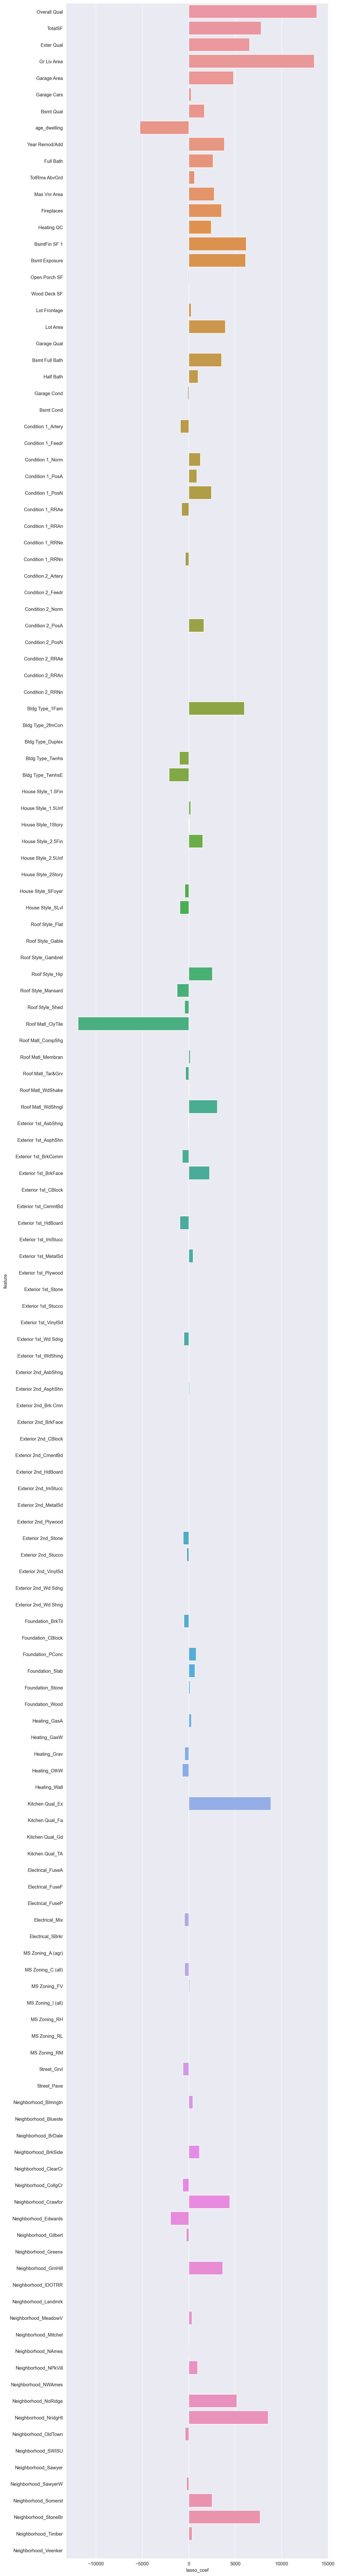

In [166]:
plt.figure(figsize=(10, 100))
ax = sns.barplot(x="lasso_coef", y="feature",  data=df_lasso_coef)

---------------------------

### Model 4: Cut off the outlier

Try to improve model by cut outliers sale price which is use mathetics formular as below to drop row which sale price is outlier. Which is sale price above 3rd qualtile 1.5 times and below 1st qualtile 1.5 times will determine as the outlier. I will drop it and see performance will improve or not.

<AxesSubplot:ylabel='SalePrice'>

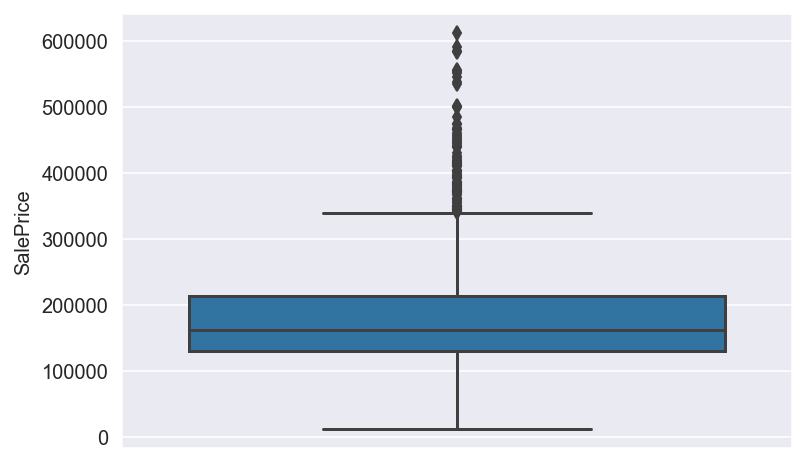

In [167]:
#plotting to see the distribution
sns.boxplot(y=clean_train['SalePrice'])

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

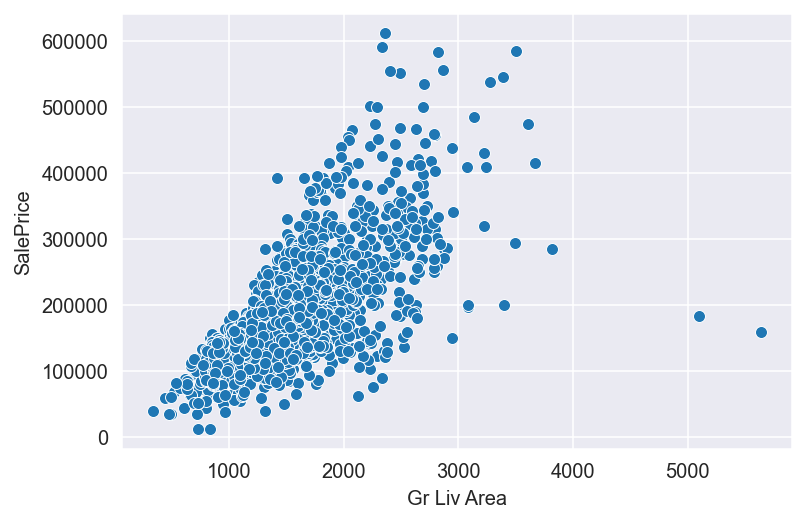

In [168]:
#Due to lasso I see that the Gr Liv area is most effect on sales price, So I quickly plot to see it.
sns.scatterplot(x=clean_train['Gr Liv Area'],y=clean_train['SalePrice'])

In [169]:
#Sort sale price to find outlier
sale_price = list(clean_train['SalePrice'])
sale_price = np.sort(sale_price)
sale_price[:10]

array([12789, 13100, 34900, 35000, 35311, 37900, 39300, 40000, 44000,
       45000])

In [170]:
#Looking for 1st quartile ,3rd quartile, Interquartile
Q1 = np.percentile(sale_price, 25, interpolation = 'midpoint')  
Q2 = np.percentile(sale_price, 50, interpolation = 'midpoint')  
Q3 = np.percentile(sale_price, 75, interpolation = 'midpoint')  
IQR = Q3 - Q1
print(Q1,"= Q1", Q3, "= Q3")
print('Interquartile range is', IQR) 

129825.0 = Q1 214000.0 = Q3
Interquartile range is 84175.0


In [171]:
#Sale price below 3562.5 and above 340262.5 consider it as the outlier
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print(low_lim, up_lim)

3562.5 340262.5


In [172]:
#take the outlier sale price in list outlier
outlier =[] 
for x in sale_price: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x) 
len(outlier)

94

I have drop outlier price 94 records from 2051 records which is 3.7%

In [173]:
df_no_outlier = dummy_train
df_no_outlier.shape

(2051, 155)

In [174]:
#drop out sale price which is outlier
for index, row in df_no_outlier.iterrows():
    if df_no_outlier['SalePrice'][index] in outlier:
        df_no_outlier.drop(axis=0,index=index,inplace=True)
df_no_outlier.shape

(1957, 155)

In [175]:
#Check number of rows that drop correctly
2051-1957

94

In [176]:
#Determine model 5
df_model5 = df_no_outlier

X = df_model5[all_feature]
y = df_model5['SalePrice']

In [177]:
#Fit it to Ridge model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)
r_alphas = np.linspace(0.1,10,100)
ridge2 = RidgeCV(alphas=r_alphas)
ridge2.fit(X_train_sc,y_train)
best_ridge_alpha = ridge.alpha_
ridge_r2_score = cross_val_score(ridge,X_train_sc,y_train,cv=10).mean() 
ridge_rmse_score = np.abs(cross_val_score(ridge,X_train_sc,y_train,cv=10,scoring='neg_root_mean_squared_error')).mean()

X_ans = dummy_test[all_feature]
X_ans_sc = ss.transform(X_ans)

predicts_ans = ridge.predict(X_ans_sc)

index = clean_test['Id']
predicts_ans = pd.Series(predicts_ans)

df_ridge2 = pd.concat([index,predicts_ans],axis=1)
df_ridge2.rename(columns = {0:"SalePrice"},inplace=True)
df_ridge2.to_csv('ver3_submission_4.csv',index=False)

In [178]:
y_preds = ridge2.predict(X_train_sc)
rmse_train = np.sqrt(mean_squared_error(y_train, y_preds))
rmse_train

#y_preds = lasso.predict(X_train_sc)
#np.sqrt(mean_squared_error(y_train, y_preds))

17027.85507677664

In [179]:
#RMSE on test data
rmse_test = np.sqrt(mean_squared_error(y_test, ridge2.predict(X_test_sc)))
rmse_test

37237.88077877243

In [180]:
#29141.04554
#print(f'Ridge R2 = {ridge_r2_score} \nRidge RMSE = {ridge_rmse_score} \nRMSE score on train data = {rmse_train}')

The model is even more overfitting after we have cut the outlier. So, I will not use this model<br>
RMSE on train is 17027.855<br>
RMSE on test data 37237.881<br>

I try on lasso model too. It's quite no significantly change

---------------------------------------

# Conclusion and recommendation

I determine the lasso model is the best model it's work more efficient (least error on predicting sale price) the most on unseen data.

And it's help to cut of not nessary feature out so, real estate agent can focus on what to do to maximize their profit

### Business recommendation

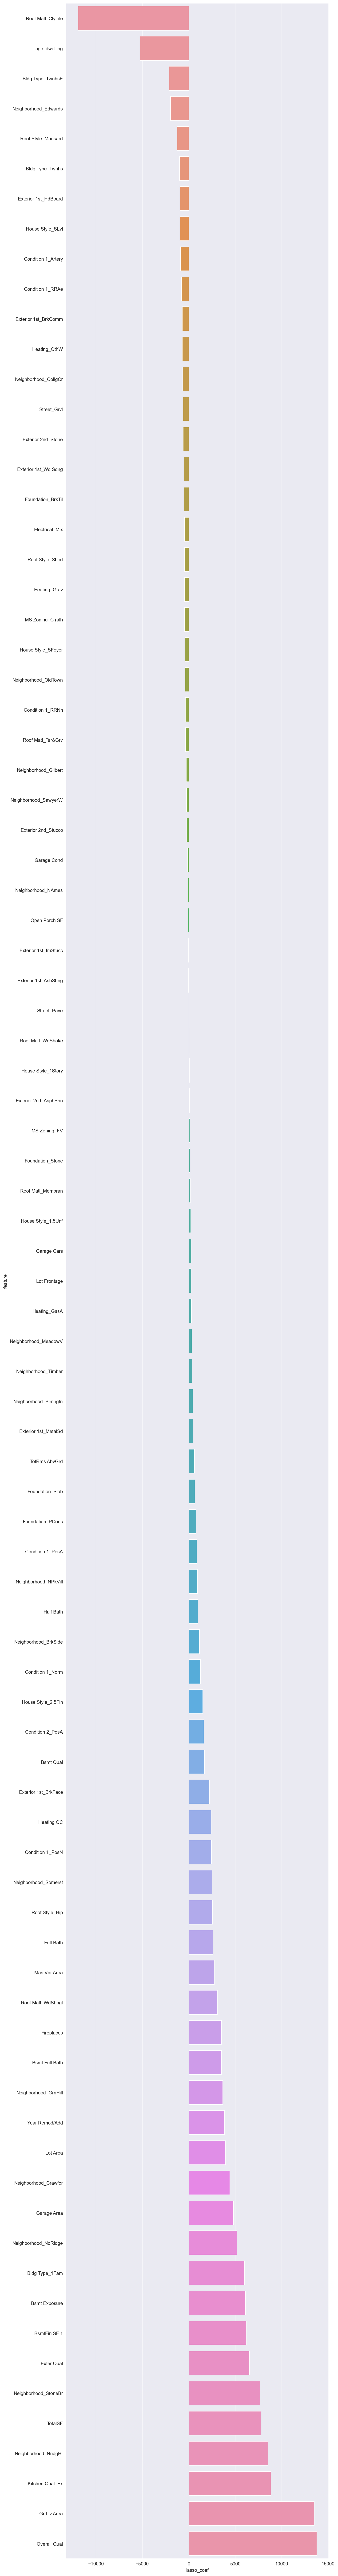

In [181]:
df_lasso_coef_nonzero = df_lasso_coef[df_lasso_coef['lasso_coef']!=0]
df_lasso_coef_nonzero = df_lasso_coef_nonzero.sort_values('lasso_coef') 
plt.figure(figsize=(10, 100))
ax2 = sns.barplot(x="lasso_coef", y="feature",  data=df_lasso_coef_nonzero)

__To maximize the house sale price:__
1. House should having a big living area (Gr Liv Area)
2. House should having a big house area which is first floor area/ second floor area/ basement area (ToTalSF)
3. Focus on quality of Kitchen, it's significantly effect on sale price
4. Newer or being newly renovated
5. Create new house should located in Northridge Heights or Stone Brook will increase the house price

__Things that be awared or it will be drop the sale price of the house__
1. Roof material -  ClyTile Clay or Tile will significantly drop the price **don't use it**. You can use others there is no much different (Roof Matl_ClyTile)
2. Should avoid building dwelling type of Townhouse End Unit will drop the house sale price.

Let's take a quick look at some neighborhoods, As it's quite effect significantly on Northridge Heights

In [182]:
neighborhoods = clean_train[['Neighborhood','SalePrice']].groupby('Neighborhood').mean().sort_values(by= 'SalePrice',ascending = False)
top_neighborhoods = neighborhoods.iloc[:5]
bottom_neighborhoods = neighborhoods.iloc[-5:]

In [183]:
plot = pd.concat([top_neighborhoods,bottom_neighborhoods])
plot.rename(index = {
    'MeadowV' : 'Meadow Village',
    'IDOTRR' :'Iowa DOT and Rail Road',
    'BrDale':'Briardale',
    'OldTown':'Old Town',
    'BrkSide' : 'Brookside',
    'Veenker': 'Veenker',
    'GrnHill' : 'Green Hill',
    'NoRidge':'Northridge',
    'NridgHt':'Northridge Heights',
    'StoneBr':'Stone Brook', 
}, inplace=True)

In [184]:
#Mean of sale price
y = (clean_train[['Neighborhood','SalePrice']].mean()).astype(int)
y

SalePrice    181469
dtype: int32

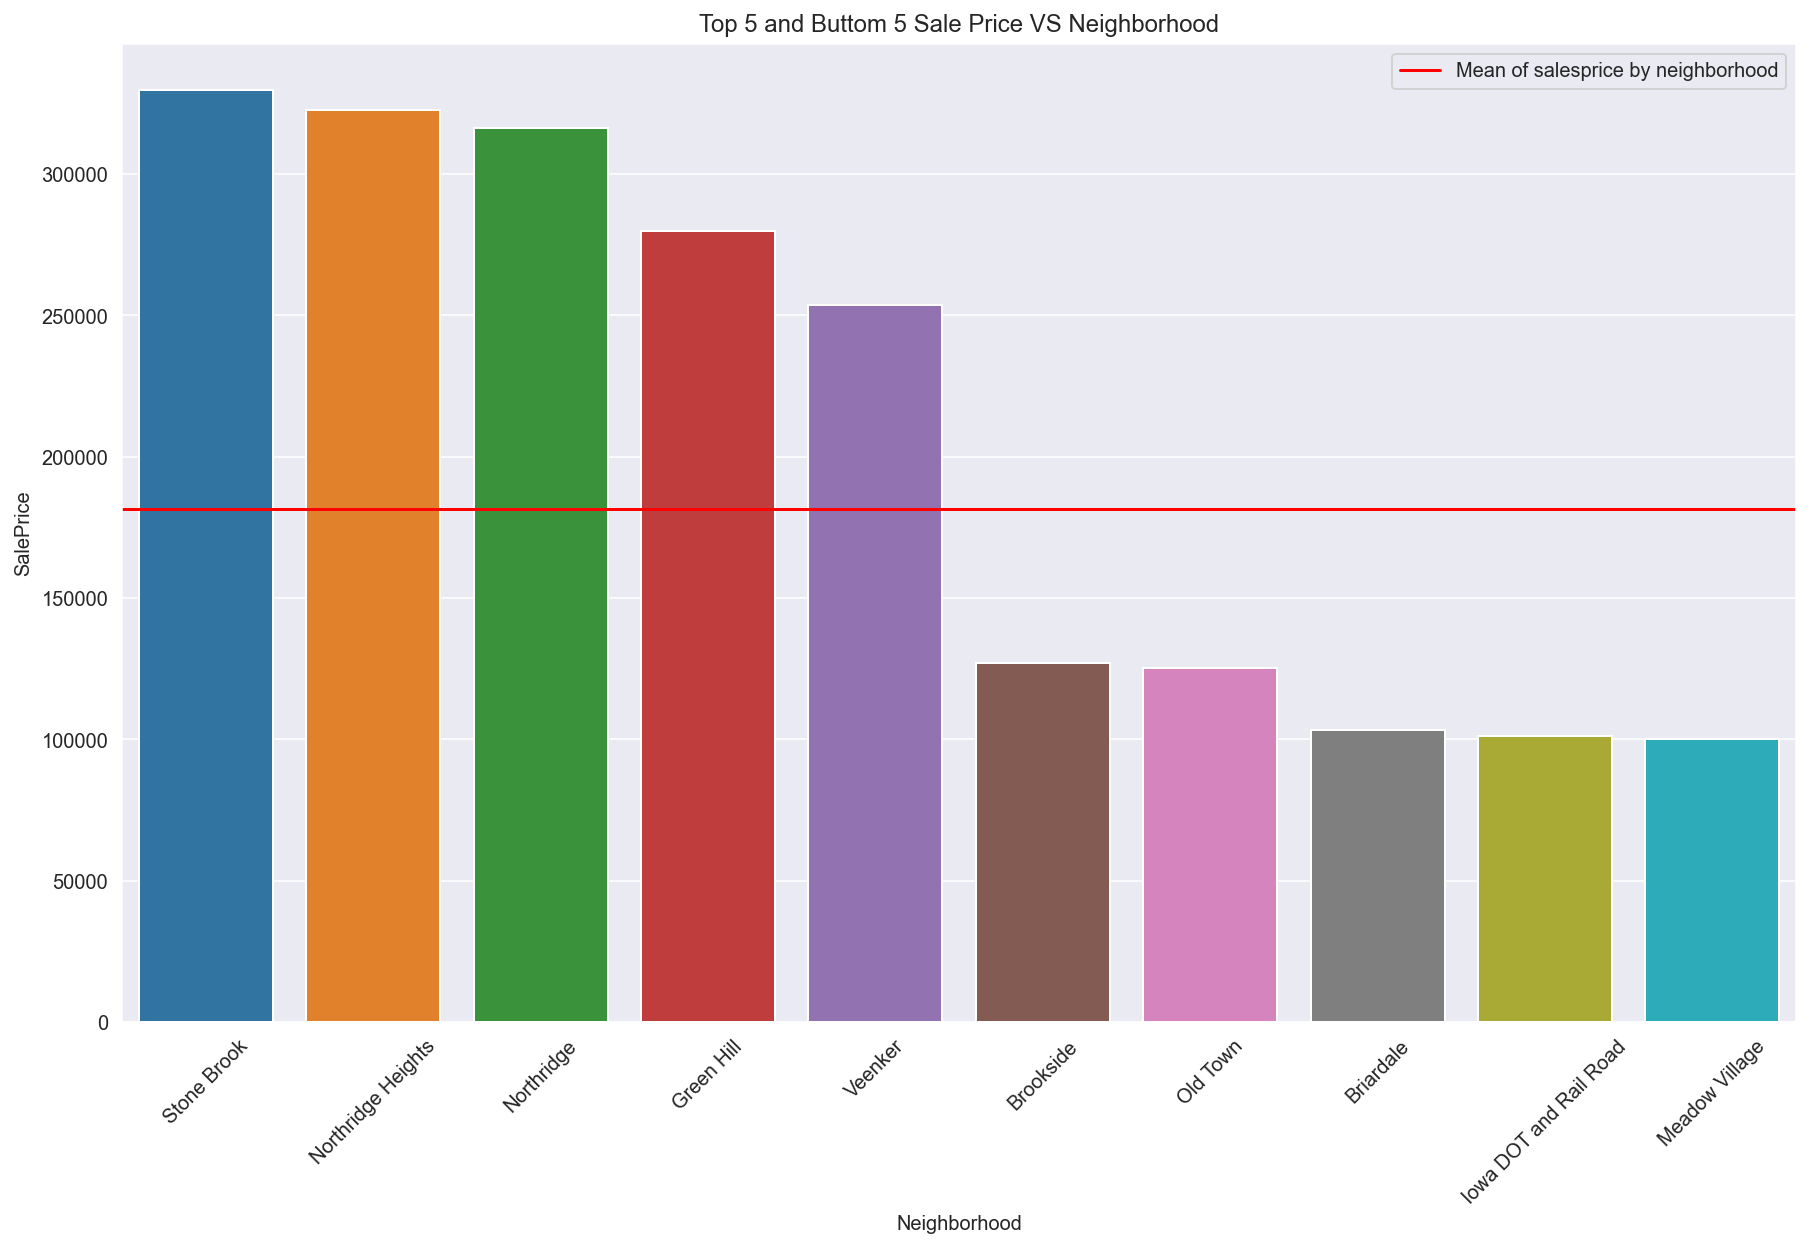

In [185]:
plt.figure(figsize=(15,9))
ax = sns.barplot(plot.index,plot['SalePrice'])
plt.title('Top 5 and Buttom 5 Sale Price VS Neighborhood')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#mean_neighbor = (clean_train[['Neighborhood','SalePrice']].mean()).astype(int)
plt.axhline(y=181469, xmin=0, xmax=1,color='red',label = 'Mean of salesprice by neighborhood')
plt.legend()
#plt.plot(50000,50000,color='red',label='Actual and predict exactly equal');

**If you are looking to invest to create new house for sale, I recommend to build in 5 this area. Stone Brook, Northrdige Heights, Northridge, Green Hill, Veenker**

### Conclusion

| Model | Train data RMSE | Test data RMSE|
|---|---|---|
|Baseline|79,239.335|79,239.335|
|Linear|24,849.852|958,428,349,241,939.1|
|Ridge|24,853.101|24,134.552|
|Lasso|25,250.400|**23,770.066**|
|Ridge (without outlier)|17,027.855 |37,237.881|

The reason why I use lasso model because it's work better on unseen data as you can see on RMSE test score of the lasso is least. And the model is quite not overfitting

**Recommendation for real estate agent for building new house and decorate it**
- Build house in 5 this area. Stone Brook, Northrdige Heights, Northridge, Green Hill, Veenker
- Having a big area of living 
- Focus on building kitchen with good quality will significantly increase the saleprice of the house
- **Don't use Clay or Tile as a roof material will significantly drop the price**. Others material are fine don't have a big different effect on sale price.
- Should avoid building dwelling type of Townhouse End Unit will drop the house sale price.

In my opinion these model are generalize. As you can see from the lasso coefficient which top feature that effect the sale price is very general. Only the neighborhood that is specific in this city. However, I think it can be adapt neighborhood with the location in other city.

---